# RESULTS PROJECT

In [2]:
import matplotlib.pyplot as plt
import numpy as np

## First graph 

In [16]:
# Lire les données du fichier "resultats_area.txt"
residues = []
areas = []

with open("/home/qcapdet/M2BI/GIT_PRJCT/Project_M2BI/OUTPUTS/results_area.txt", "r") as file:
    for line in file:
        parts = line.strip().split()
        residue = int(parts[1])
        area = float(parts[-1])
        residues.append(residue)
        areas.append(area)

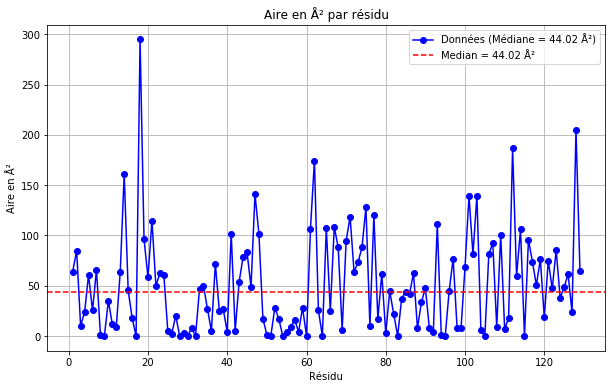

In [17]:
# Calculer la médiane
median_value = np.median(areas)

# Créer le graphique
plt.figure(figsize=(10, 6))
plt.plot(residues, areas, marker='o', linestyle='-', color='b', label='Données (Médiane = {:.2f} Å²)'.format(median_value))
plt.axhline(y=median_value, color='r', linestyle='--', label='Median = {:.2f} Å²'.format(median_value))
plt.title('Aire en Å² par résidu')
plt.xlabel('Résidu')
plt.ylabel('Aire en Å²')
plt.grid(True)
plt.legend()

In [18]:
# Lire les données du fichier "resultats_area.txt"
residues = []
areas = []

with open("/home/qcapdet/M2BI/GIT_PRJCT/Project_M2BI/OUTPUTS/results_sasa.txt", "r") as file:
    for line in file:
        parts = line.strip().split()
        residue = int(parts[1])
        area = float(parts[-1])
        residues.append(residue)
        areas.append(area)

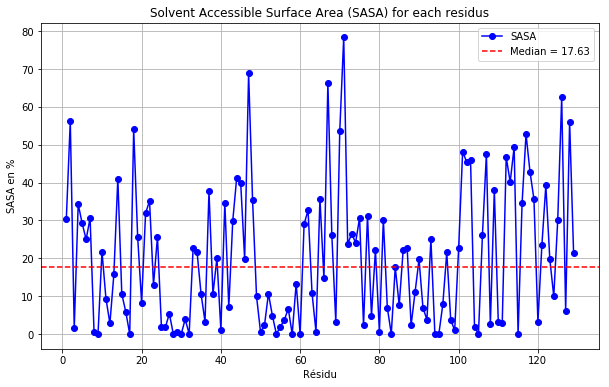

In [19]:
# Calculate the mean and median
mean_value = np.mean(areas)
median_value = np.median(areas)

# Create the graph
plt.figure(figsize=(10, 6))
plt.plot(residues, areas, marker='o', linestyle='-', color='b', label='SASA')
plt.axhline(y=median_value, color='r', linestyle='--', label='Median = {:.2f}'.format(median_value))
plt.title('Solvent Accessible Surface Area (SASA) for each residus')
plt.xlabel('Résidu')
plt.ylabel('SASA en %')
plt.legend()
plt.grid(True)

# Show the mean value in the legend
legend = plt.legend()
legend.get_lines()[1].set_markerfacecolor('r')
legend.get_lines()[1].set_markeredgecolor('r')
legend.get_lines()[1].set_markersize(10)
legend.get_lines()[1].set_linestyle('--')

## Second graph

In [20]:
# Liste des noms de fichiers à superposer
file_names = ["OUTPUTS/results_area_20.txt", "OUTPUTS/results_area_50.txt", "OUTPUTS/results_area.txt", "OUTPUTS/results_area_300.txt", "OUTPUTS/results_area_500.txt", "OUTPUTS/results_area_1000.txt"]
# Initialiser une liste pour stocker les médianes de chaque fichier
medians = []

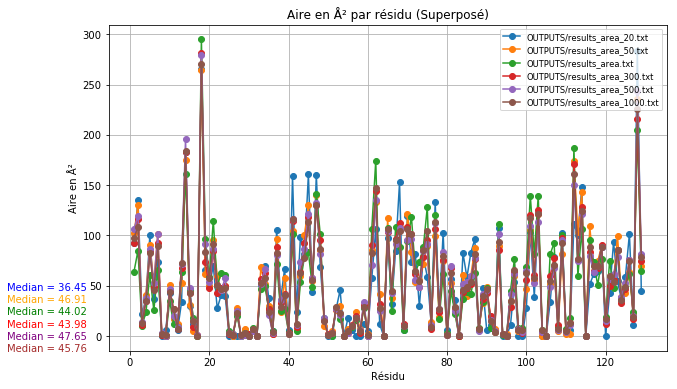

In [21]:
# Créer le graphique
plt.figure(figsize=(10, 6))

# Boucle pour lire et superposer les données de chaque fichier
for file_name in file_names:
    residues = []
    areas = []

    with open(file_name, "r") as file:
        for line in file:
            parts = line.strip().split()
            residue = int(parts[1])
            area = float(parts[-1])
            residues.append(residue)
            areas.append(area)

    plt.plot(residues, areas, marker='o', linestyle='-', label=file_name)

    # Calculer et ajouter la médiane à la liste
    median = np.median(areas)
    medians.append(median)

# Calculer la médiane globale
global_median = np.median(medians)

# Titres et étiquettes
plt.title('Aire en Å² par résidu (Superposé)')
plt.xlabel('Résidu')
plt.ylabel('Aire en Å²')
plt.grid(True)

# Afficher le graphique
plt.legend(loc='upper right', fontsize='small')

# Ajouter les valeurs médianes sur le côté gauche, espacées en fonction de la légende
legend_labels = [label.get_text() for label in plt.gca().get_legend().get_texts()]
colors = ['b', 'orange', 'g', 'r', 'purple', 'brown']  # Ajoutez ici les couleurs correspondant à vos légendes

for i, label in enumerate(legend_labels):
    plt.text(-31, global_median - i * 12, 'Median = {:.2f}'.format(medians[i]), color=colors[i])


## Third graph : 

In [45]:
# Ouvrir les fichiers 1 et 2 en lecture
with open("OUTPUTS/Results_website.txt", "r") as file1, open("OUTPUTS/results_area_500.txt", "r") as file2:
    lines_file1 = file1.readlines()
    lines_file2 = file2.readlines()

# Vérifie si les fichiers ont le même nombre de lignes
if len(lines_file1) != len(lines_file2):
    print("Les fichiers n'ont pas le même nombre de lignes.")
else:
    total_percentage_difference = 0
    count = 0
    
    for i in range(len(lines_file1)):
        # Lire la valeur du fichier 1 (colonne 5)
        value_file1 = float(lines_file1[i].split()[5])

        # Lire la valeur du fichier 2 (dernière colonne)
        value_file2 = float(lines_file2[i].split()[-1])

        # Calculer la différence entre les valeurs
        difference = value_file1 - value_file2

        # Calculer le pourcentage de différence
        if value_file2 != 0:
            percentage_difference = round(abs((difference / value_file2) * 100))
        else:
            percentage_difference = 0
        
        # Ajouter le pourcentage de différence à la somme
        total_percentage_difference += percentage_difference

        # Incrémenter le compteur
        count += 1

        # Afficher les résultats pour chaque paire de lignes
        print("  Pourcentage de différence :", percentage_difference, "%")
        
# Calculer la moyenne des pourcentages de différence
if count > 0:
    average_percentage_difference = total_percentage_difference / count
else:
    average_percentage_difference = 0

# Afficher la moyenne
print("Moyenne des pourcentages de différence :", round(average_percentage_difference))


  Pourcentage de différence : 16 %
  Pourcentage de différence : 10 %
  Pourcentage de différence : 25 %
  Pourcentage de différence : 8 %
  Pourcentage de différence : 10 %
  Pourcentage de différence : 13 %
  Pourcentage de différence : 19 %
  Pourcentage de différence : 100 %
  Pourcentage de différence : 0 %
  Pourcentage de différence : 4 %
  Pourcentage de différence : 14 %
  Pourcentage de différence : 100 %
  Pourcentage de différence : 25 %
  Pourcentage de différence : 8 %
  Pourcentage de différence : 18 %
  Pourcentage de différence : 150 %
  Pourcentage de différence : 100 %
  Pourcentage de différence : 84 %
  Pourcentage de différence : 1 %
  Pourcentage de différence : 31 %
  Pourcentage de différence : 5 %
  Pourcentage de différence : 38 %
  Pourcentage de différence : 1 %
  Pourcentage de différence : 17 %
  Pourcentage de différence : 22 %
  Pourcentage de différence : 74 %
  Pourcentage de différence : 33 %
  Pourcentage de différence : 0 %
  Pourcentage de différe